# House Price Prediction Assignment

# Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Steps to be followed:
- Step 1: Reading and Understanding the Data
- Step 2: Data Visualisation
- Step 3: Missing Value Treatment
- Step 4: Data Preparation
    - Splitting the data into Train and Test Sets
    - Feature Scaling
- Step 5: Building Model
    - Dividing into X and Y sets for the model building
    - Apply Lasso Regression
    - Apply Ridge Regression
- Step 6: Model Evaluation
    - Check Lasso Model Evaluation
    - Check Ridge Model Evaluation

## Step 1: Reading and Understanding the Data

In [1]:
#Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
pd.set_option('display.max_rows', 81)
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [3]:
#Read the data
housedata = pd.read_csv('train.csv')

In [4]:
#observe data
housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Inspect the no of rows and columns
housedata.shape

(1460, 81)

In [6]:
#Inspect the data types and null values
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#Inspect the statistical values
housedata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Observation**
- The dataset has 81 columns and 1460 rows 
- Sale Price is the target variable.
- Few columns can be dropped which are not meaningful. e.g. Id
- Below columns has NA values but as per data dictionary NA means some attribute of the house which is not available. Hence, we can replace these values with "None".
"Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"

## Step 2: Data Visualisation
1. Visualising the numerical variables
- Observe multicolinearity
-  Identify if some predictors directly have a strong association with the outcome variable
2. Visualising the categorical variables

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

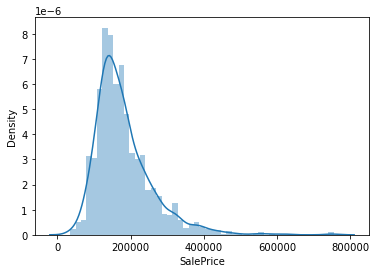

In [8]:
#Visualise the target variable
sns.distplot(housedata.SalePrice)

**Observation**
- Saleprice data is skewed.

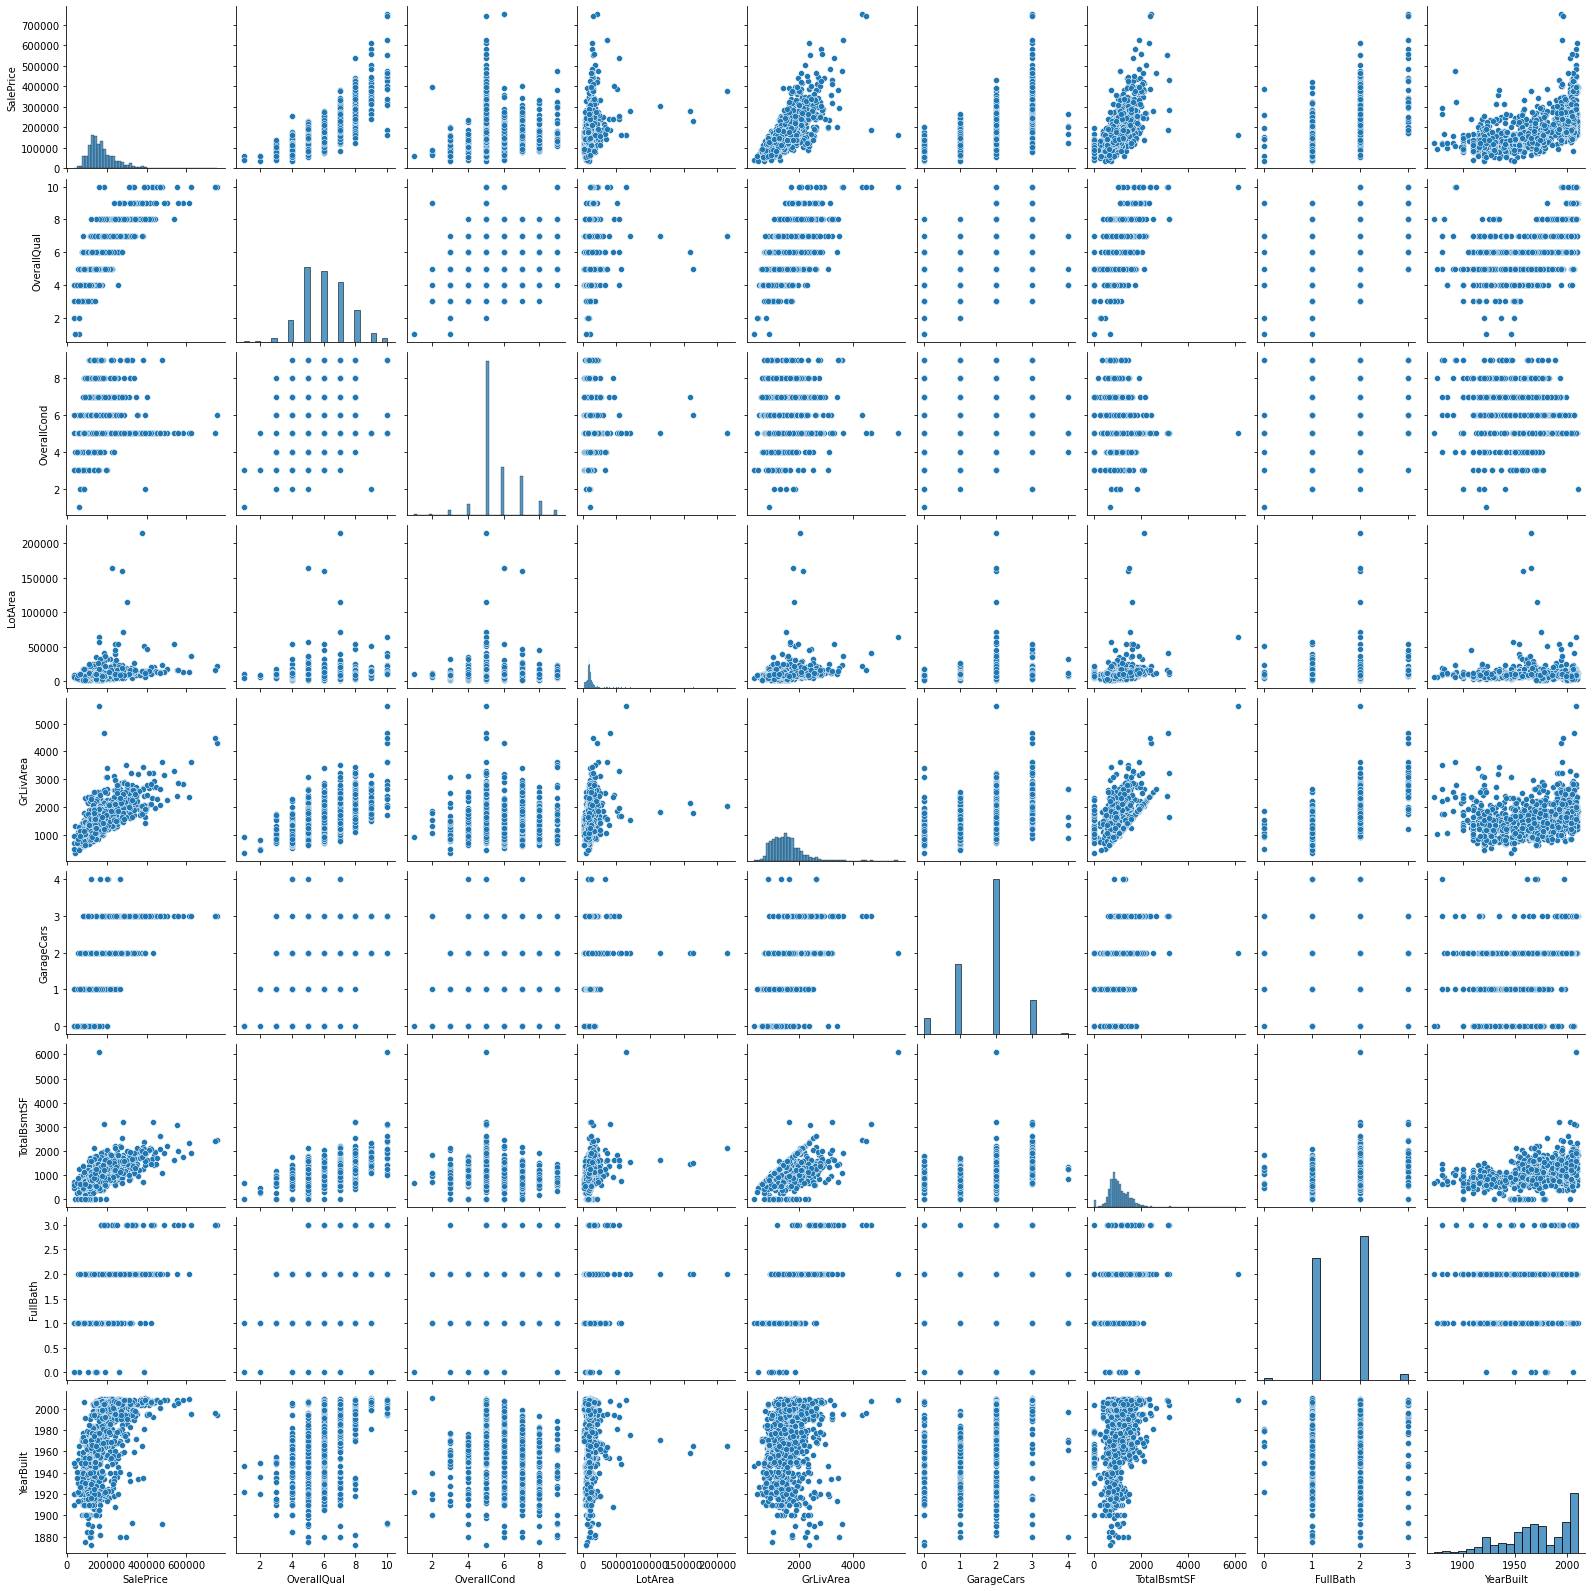

In [9]:
#Visualising the numerical variables
housedata_num = housedata[['SalePrice', 'OverallQual', 'OverallCond','LotArea','GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
sns.pairplot(housedata_num)
plt.show()

**Observation**
- SalePrice and TotalBsmtSF shows linear relationship
- SalePrice and GrLivArea shows linear relationship
- GrLivArea and TotalBsmtSF shows linear relationship

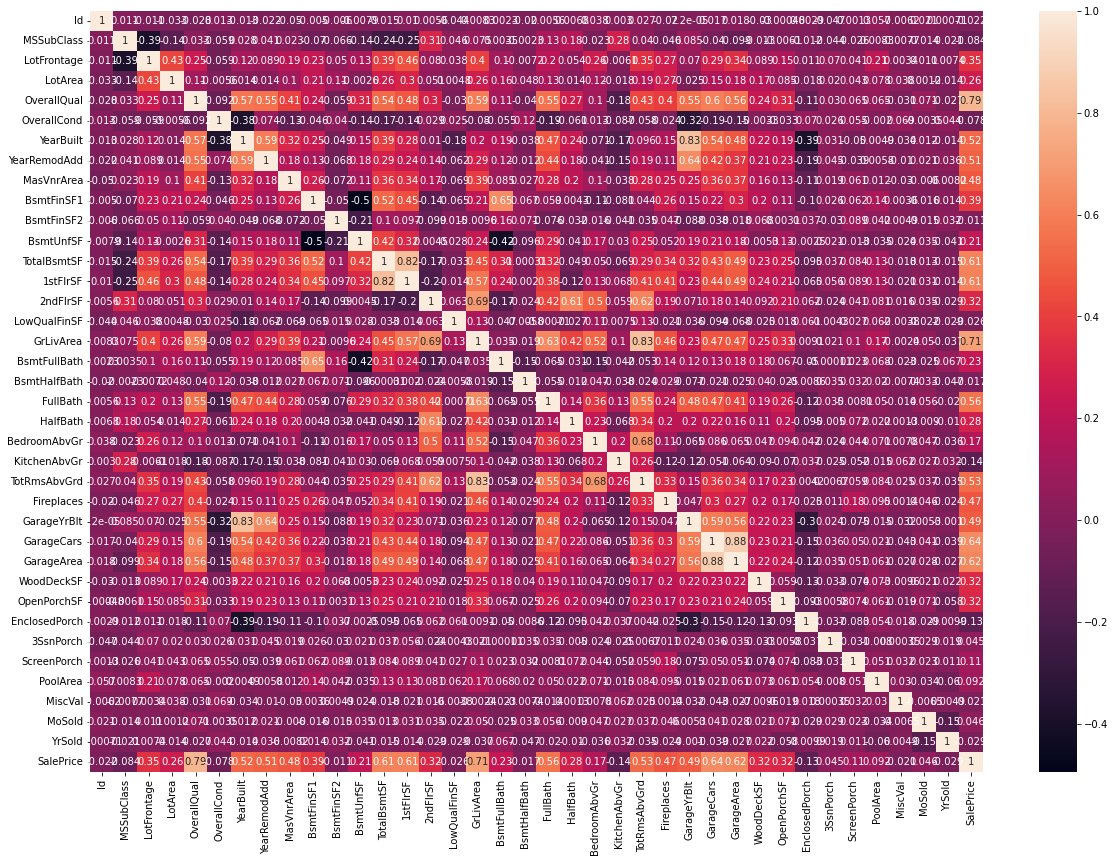

In [10]:
#Plot correlations on heatmap
plt.figure(figsize=(20,14))
sns.heatmap(housedata.corr(), annot=True)
plt.show()

**Observation**
- YearBuilt and GarageYrBlt are highly collinear hence one of them can be dropped.
- SalePrice is highly correlated positively with OverallQual, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, TotalBsmtSF, GrLivArea, FullBath, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF and OpenPorchSF. Hence these can be good predictors.
- Saleprice is negatively correlated with KitchenAbvGr and EncosedPorch. So these also can also be good predictors.

In [11]:
#Drop Id and GarageYrBlt column
housedata.drop(["Id", "GarageYrBlt"],  axis=1, inplace=True)

In [16]:
housedata.shape

(1460, 79)

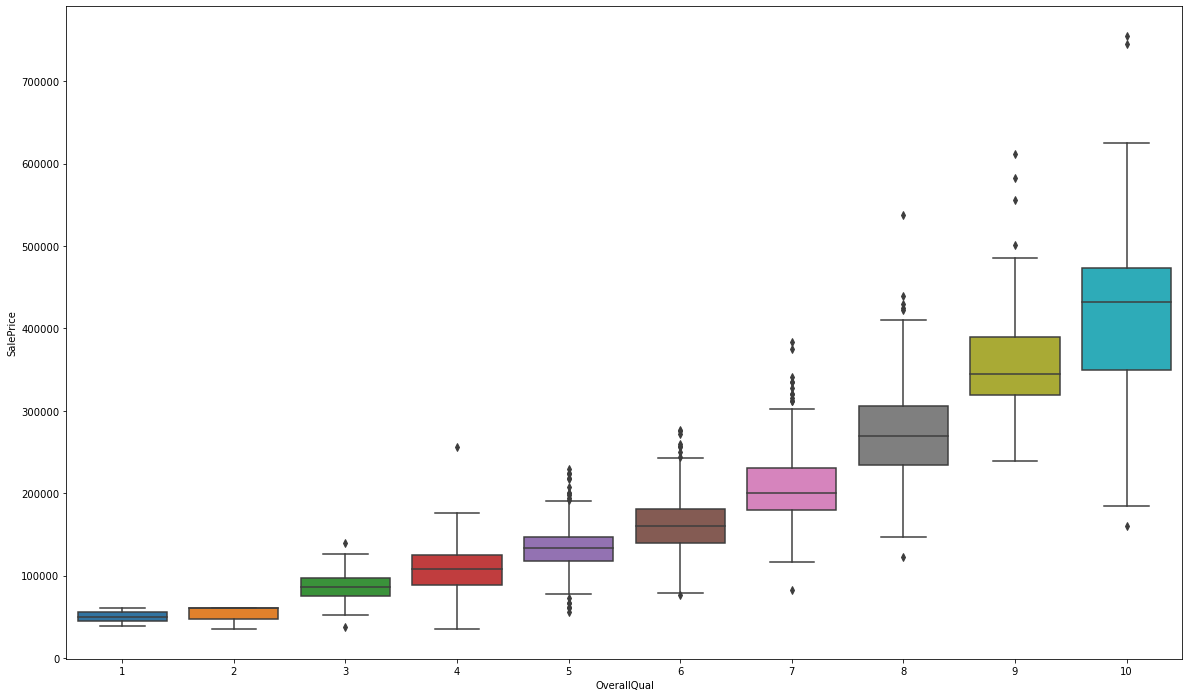

In [17]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = housedata)
plt.show()

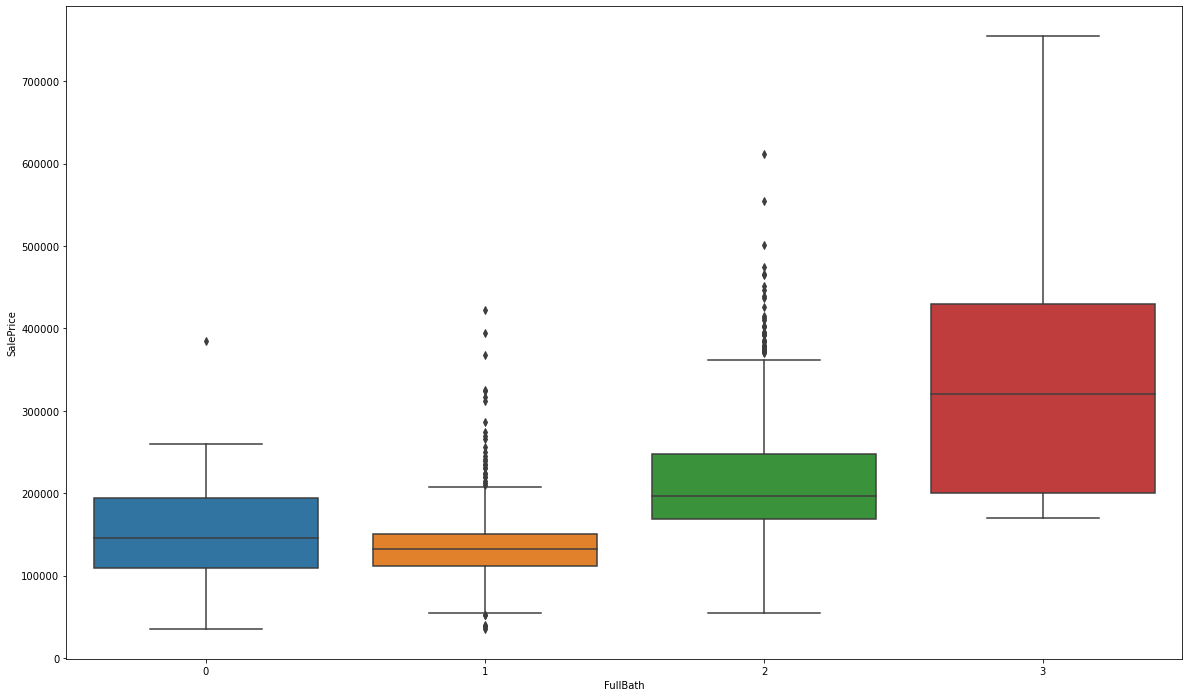

In [18]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'FullBath', y = 'SalePrice', data = housedata)
plt.show()

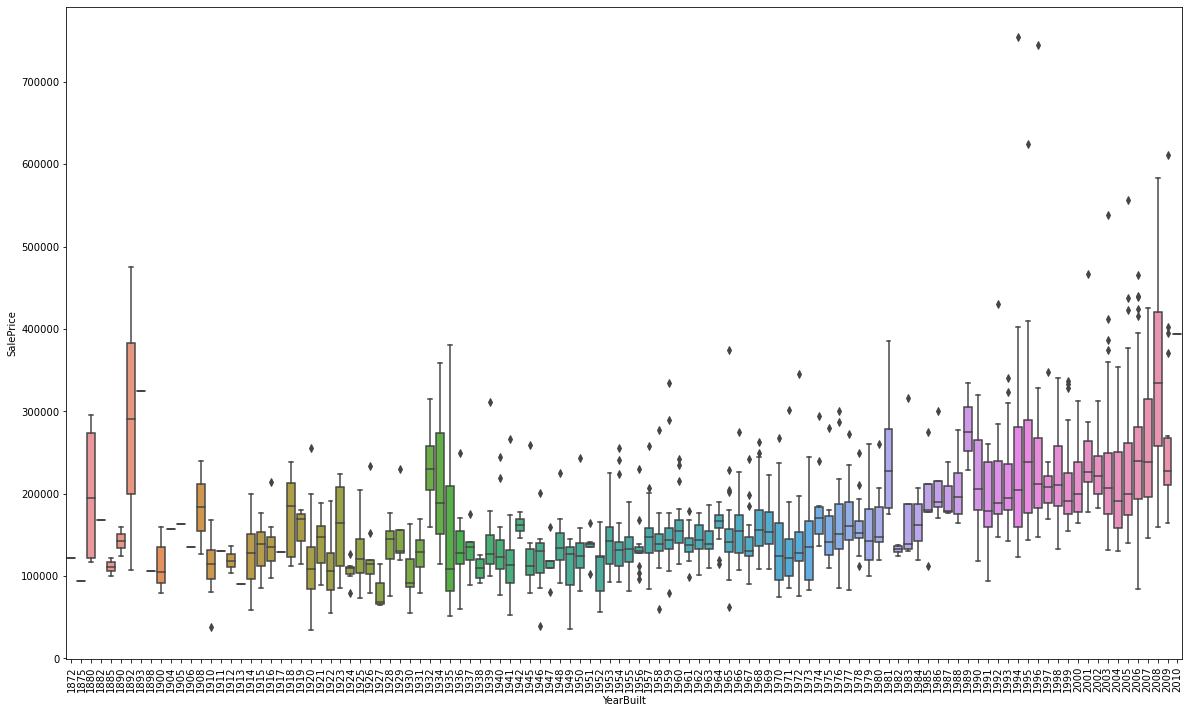

In [19]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = housedata)
plt.xticks(rotation=90);
plt.show()

**Observation**
- As Overall Quality increases, Sale Price increases.
- As number of full bathrooms increases, Sale Price increases.
- Sale price increases if house is recently built.

## Step 3: Missing Value Treatment

In [20]:
#Calculate missing value %
total = housedata.isnull().sum().sort_values(ascending=False)
pct = (housedata.isnull().sum()/len(housedata)*100).sort_values(ascending = False)
missing_null_pct = pd.concat([total, pct], axis=1, keys=['Total', 'Percent'])
missing_null_pct.head(5)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274


In [21]:
# House attrbutes where NA has certain meaning and replace them with None. "Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"
NA_Values = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in NA_Values:
    housedata[i].fillna("None", inplace=True)
housedata.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [22]:
#Calculate missing value %
total = housedata.isnull().sum().sort_values(ascending=False)
pct = (housedata.isnull().sum()/len(housedata)*100).sort_values(ascending = False)
missing_null_pct = pd.concat([total, pct], axis=1, keys=['Total', 'Percent'])
missing_null_pct.head(5)


,Total,Percent
LotFrontage,259,17.739726
MasVnrType,8,0.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493
KitchenAbvGr,0,0.000000


**Observation**
- LotFrontage has lot of null values hence we can drop this column
- MasVnrType, MasVnrArea also have null values.
- We can fill MasVnrType with 'None' as this is categorical variable. 
- We can fill null values with median MasVnrArea
- Electrical has only one row as NA hence we can delete this row

In [23]:
housedata.drop("LotFrontage", axis=1, inplace=True)

In [24]:
housedata["MasVnrType"].fillna("None", inplace=True)
housedata["MasVnrArea"].fillna(housedata["MasVnrArea"].median(), inplace=True)


In [25]:
housedata.dropna(inplace = True)

In [26]:
#Calculate missing value %
total = housedata.isnull().sum().sort_values(ascending=False)
pct = (housedata.isnull().sum()/len(housedata)*100).sort_values(ascending = False)
missing_null_pct = pd.concat([total, pct], axis=1, keys=['Total', 'Percent'])
missing_null_pct.head(5)

,Total,Percent
MSSubClass,0,0.0
BedroomAbvGr,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0


**Observation**
- All missing values have been imputed successully.

In [27]:
#Handling Data Types
datatypes = housedata.dtypes 
datatypes

MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object


In [28]:
#numerical and categorical values 
num_values = datatypes[(datatypes == 'int64') | (datatypes == float)]
cat_values = datatypes[datatypes == object] 

In [29]:
print(num_values.index)

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [30]:
print(cat_values.index)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


## Step 4: Data Preparation


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

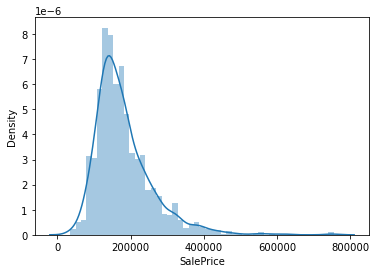

In [31]:
sns.distplot(housedata["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

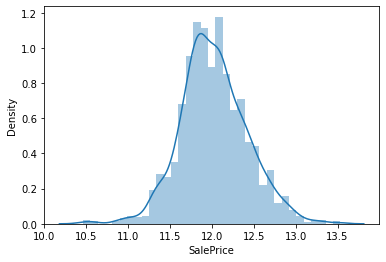

In [32]:
sns.distplot(np.log(housedata["SalePrice"]))

**Observation**
The SalePrice data is positively skewed hence we can apply log transformation to make data normally distributed.

In [33]:
housedata["SalePrice"] = np.log(housedata["SalePrice"])

In [34]:
housedata["SalePrice"]

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1459, dtype: float64

### Creating Dummy Variables

In [35]:
#Create dummy variable for categorical values
housedata_cat = housedata[cat_values.index]
housedata_cat_dummies = pd.get_dummies(housedata_cat, drop_first=True)

In [36]:
#concatenate dummy data with the earlier dataframe
housedata = pd.concat([housedata, housedata_cat_dummies],axis=1)

In [37]:
housedata.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [38]:
#remove unwanted columns
housedata.drop(housedata_cat.columns, axis=1, inplace=True) 

In [39]:
housedata.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


**Observation**
- Dummy variables are created correctly.

### Splitting the data into Train and Test Sets 

In [40]:
#Split the data into training and testing set
df_train, df_test = train_test_split(housedata, train_size=0.7, test_size=0.3, random_state=100)

In [41]:
print(df_train.shape)
print(df_test.shape)

(1021, 258)
(438, 258)


### Feature Scaling

In [42]:
#Rescaling the features
scaler = MinMaxScaler()
#apply scaler to variables other than binary values(0 and 1) and dummy variables
housedata_num = housedata[num_values.index]
listtoscale =housedata_num.columns

df_train[listtoscale] = scaler.fit_transform(df_train[listtoscale])
df_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
984,0.411765,0.040455,0.444444,0.500,0.760870,0.450000,0.000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
1416,1.000000,0.046139,0.333333,0.625,0.094203,0.000000,0.000,0.000000,0.000000,0.332620,...,0,0,0,0,1,0,0,0,1,0
390,0.176471,0.032409,0.444444,0.875,0.202899,0.000000,0.000,0.042700,0.265265,0.098031,...,0,0,0,0,1,0,0,0,1,0
877,0.235294,0.034416,0.888889,0.500,0.956522,0.916667,0.135,0.207300,0.000000,0.125000,...,0,0,0,0,1,0,0,0,1,0
567,0.000000,0.040670,0.666667,0.500,0.956522,0.900000,0.105,0.000354,0.000000,0.648545,...,0,0,0,0,1,0,0,0,1,0


In [43]:
#Scale Test Data
df_test[listtoscale] = scaler.transform(df_test[listtoscale])
df_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
789,0.235294,0.050185,0.555556,0.875,0.681159,0.950000,0.098125,0.100638,0.0,0.113014,...,0,0,0,0,1,0,0,0,1,0
425,0.235294,0.008893,0.666667,0.875,0.536232,0.700000,0.000000,0.000000,0.0,0.278682,...,0,0,0,0,1,0,0,0,1,0
204,0.176471,0.009464,0.444444,0.750,0.543478,0.000000,0.000000,0.055280,0.0,0.174658,...,0,0,0,0,1,0,0,0,1,0
118,0.235294,0.050985,0.666667,0.500,0.855072,0.666667,0.000000,0.260454,0.0,0.086901,...,0,0,0,0,1,0,0,0,1,0
244,0.235294,0.034631,0.666667,0.500,0.884058,0.866667,0.000000,0.123140,0.0,0.108305,...,0,0,0,0,1,0,0,0,1,0


## Step 5: Building Model

### Dividing into X and Y sets for the model building

In [44]:
#Training data
X_train = df_train.drop("SalePrice", axis=1)
y_train = df_train["SalePrice"]

In [45]:
#X_train.head()
X_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
984,0.411765,0.040455,0.444444,0.500,0.760870,0.450000,0.000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
1416,1.000000,0.046139,0.333333,0.625,0.094203,0.000000,0.000,0.000000,0.000000,0.332620,...,0,0,0,0,1,0,0,0,1,0
390,0.176471,0.032409,0.444444,0.875,0.202899,0.000000,0.000,0.042700,0.265265,0.098031,...,0,0,0,0,1,0,0,0,1,0
877,0.235294,0.034416,0.888889,0.500,0.956522,0.916667,0.135,0.207300,0.000000,0.125000,...,0,0,0,0,1,0,0,0,1,0
567,0.000000,0.040670,0.666667,0.500,0.956522,0.900000,0.105,0.000354,0.000000,0.648545,...,0,0,0,0,1,0,0,0,1,0


In [46]:
y_train.head()

984     0.417599
1416    0.408435
390     0.399006
877     0.749926
567     0.589900
Name: SalePrice, dtype: float64

In [47]:
#Test data
X_test = df_test.drop("SalePrice", axis=1)
y_test = df_test["SalePrice"]

In [48]:
X_test

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
789,0.235294,0.050185,0.555556,0.875,0.681159,0.950000,0.098125,0.100638,0.0,0.113014,...,0,0,0,0,1,0,0,0,1,0
425,0.235294,0.008893,0.666667,0.875,0.536232,0.700000,0.000000,0.000000,0.0,0.278682,...,0,0,0,0,1,0,0,0,1,0
204,0.176471,0.009464,0.444444,0.750,0.543478,0.000000,0.000000,0.055280,0.0,0.174658,...,0,0,0,0,1,0,0,0,1,0
118,0.235294,0.050985,0.666667,0.500,0.855072,0.666667,0.000000,0.260454,0.0,0.086901,...,0,0,0,0,1,0,0,0,1,0
244,0.235294,0.034631,0.666667,0.500,0.884058,0.866667,0.000000,0.123140,0.0,0.108305,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,0.000000,0.034617,0.333333,0.500,0.572464,0.016667,0.000000,0.148122,0.0,0.000000,...,0,0,0,0,0,0,0,0,1,0
266,0.235294,0.045517,0.555556,0.500,0.905797,0.783333,0.000000,0.126506,0.0,0.037671,...,0,0,0,0,1,0,0,0,1,0
210,0.058824,0.019306,0.444444,0.625,0.384058,0.000000,0.000000,0.082920,0.0,0.169521,...,0,0,0,0,1,0,0,0,1,0
318,0.235294,0.039403,0.666667,0.500,0.876812,0.716667,0.160000,0.174876,0.0,0.154110,...,0,0,0,0,1,0,0,0,1,0


In [49]:
y_test

789    0.546898
425    0.440041
204    0.373425
118    0.720777
244    0.575924
         ...   
771    0.348863
266    0.542532
210    0.335850
318    0.653235
239    0.382177
Name: SalePrice, Length: 438, dtype: float64

### Apply Lasso Regression

In [50]:
# list of alphas to tune
params = {'alpha': [0.00001, 0.000025, 0.000050, 0.0001, 0.00025, 0.00050, 0.001, 0.0025, 0.0050, 0.01 ]}

In [51]:
# Applying Lasso Regression
lasso = Lasso()

# Applying cross validation technique due to less sample size for training data
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 2.5e-05, 5e-05, 0.0001, 0.00025,
                                   0.0005, 0.001, 0.0025, 0.005, 0.01]},
             return_train_score=True, scoring='r2', verbose=1)

In [52]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.096990,0.018162,0.003800,0.001632,0.00001,{'alpha': 1e-05},0.920840,0.839960,0.842800,0.665515,...,0.836272,0.091802,7,0.951823,0.963563,0.962549,0.953200,0.955345,0.957296,0.004846
1,0.090017,0.022292,0.003535,0.001291,0.000025,{'alpha': 2.5e-05},0.929942,0.849297,0.843832,0.677908,...,0.844697,0.090732,5,0.950003,0.961785,0.960519,0.951706,0.953067,0.955416,0.004800
2,0.051134,0.016421,0.003519,0.000428,0.00005,{'alpha': 5e-05},0.934753,0.860349,0.839882,0.690331,...,0.850524,0.088160,4,0.946260,0.958073,0.956778,0.948719,0.947922,0.951551,0.004879
3,0.024994,0.002052,0.003101,0.000204,0.0001,{'alpha': 0.0001},0.936676,0.873684,0.841200,0.706889,...,0.855709,0.081710,3,0.938220,0.950468,0.949632,0.942975,0.939561,0.944171,0.005051
4,0.014527,0.000911,0.002903,0.000206,0.00025,{'alpha': 0.00025},0.926321,0.888448,0.851191,0.744024,...,0.862912,0.064312,1,0.916958,0.928146,0.935167,0.928685,0.921073,0.926006,0.006354
5,0.011977,0.001336,0.002801,0.000401,0.0005,{'alpha': 0.0005},0.911112,0.874667,0.846820,0.782775,...,0.859425,0.043443,2,0.886574,0.893932,0.904576,0.909424,0.891263,0.897154,0.008516
6,0.011018,0.000629,0.002790,0.000396,0.001,{'alpha': 0.001},0.890277,0.852883,0.823111,0.792051,...,0.842371,0.032964,6,0.859523,0.867868,0.875340,0.882493,0.864236,0.869892,0.008150
7,0.013418,0.006331,0.004782,0.002731,0.0025,{'alpha': 0.0025},0.819130,0.787731,0.767489,0.783599,...,0.787220,0.017339,8,0.791451,0.801935,0.807040,0.817488,0.800109,0.803605,0.008571
8,0.019208,0.006794,0.006126,0.002279,0.005,{'alpha': 0.005},0.706221,0.685784,0.681443,0.711750,...,0.690232,0.016762,9,0.690165,0.701764,0.708729,0.711146,0.698438,0.702048,0.007506
9,0.008024,0.000655,0.002405,0.000489,0.01,{'alpha': 0.01},0.556138,0.552104,0.544274,0.576374,...,0.553360,0.013116,10,0.553440,0.557906,0.554994,0.562871,0.565241,0.558890,0.004517


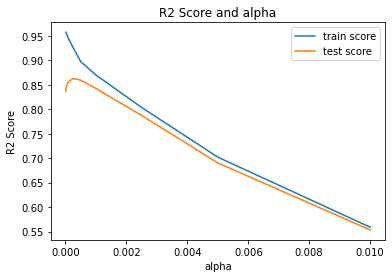

In [53]:
# plotting mean test and train scores with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])


plt.xlabel('alpha')
plt.ylabel('R2 Score')

plt.title("R2 Score and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [54]:
#Finding best alpha value for tuning the model
lasso_model_cv.best_params_

{'alpha': 0.00025}

In [55]:
lasso_model_cv.best_score_

0.862911765650334

In [56]:
#Apply optimal alpha value to fit the model
alpha=0.00025
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.00025)

In [57]:
#printing coefficient values of features in lasso model
lasso.coef_

array([-3.06480843e-02,  0.00000000e+00,  1.62771230e-01,  8.88354645e-02,
        3.52134031e-02,  1.96050133e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.66702431e-04,  2.19717465e-02,  6.74222770e-03,
        0.00000000e+00, -0.00000000e+00,  3.34406043e-01,  4.74086210e-02,
        0.00000000e+00,  3.13297378e-02,  1.13425645e-02,  0.00000000e+00,
       -0.00000000e+00,  4.08554923e-02,  0.00000000e+00,  5.47304158e-02,
        2.80579926e-02,  2.35038749e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00269576e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -4.05469971e-03,  1.30276487e-02,  0.00000000e+00,
        1.69844179e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  1.19505821e-03, -0.00000000e+00, -3.93227574e-04,
        0.00000000e+00,  2.33999091e-03,  0.00000000e+00, -0.00000000e+00,
        1.16982403e-02, -0.00000000e+00, -0.00000000e+00, -2.21571968e-03,
        0.00000000e+00,  

**Observation**
- There are many features which have 0 coefficient means lasso has eliminated these features.
- The optimal values of lambda with Lasso regression is 0.00025

### Apply Ridge Regression

In [58]:
#List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [59]:
# Applying Ridge
ridge = Ridge()

# Applying cross validation technique due to less sample size for training data
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [60]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009343,1.634821e-03,0.002921,1.108275e-03,0.0001,{'alpha': 0.0001},0.909306,0.820768,0.833037,0.685112,...,0.825198,0.076867,23,0.952422,0.964244,0.963351,0.953880,0.956146,0.958009,0.004882
1,0.007333,6.003525e-04,0.002397,4.890709e-04,0.001,{'alpha': 0.001},0.909450,0.821138,0.834024,0.668002,...,0.822540,0.083524,25,0.952421,0.964244,0.963342,0.953864,0.956146,0.958003,0.004882
2,0.006615,8.087193e-04,0.002795,3.980282e-04,0.01,{'alpha': 0.01},0.910695,0.824666,0.836390,0.655030,...,0.823710,0.090347,24,0.952392,0.964214,0.963250,0.953815,0.956102,0.957955,0.004873
3,0.008744,1.679658e-03,0.002800,7.489657e-04,0.05,{'alpha': 0.05},0.913327,0.836752,0.840418,0.659321,...,0.830206,0.090884,21,0.951924,0.963689,0.962755,0.953684,0.955559,0.957522,0.004803
4,0.007001,6.318829e-04,0.003000,3.071809e-06,0.1,{'alpha': 0.1},0.913887,0.846673,0.843445,0.665798,...,0.834618,0.089132,20,0.951032,0.962603,0.961841,0.953447,0.954563,0.956697,0.004659
5,0.008002,2.967904e-06,0.002598,4.886829e-04,0.2,{'alpha': 0.2},0.913057,0.858237,0.846894,0.677013,...,0.839700,0.085192,19,0.949128,0.960118,0.959772,0.952827,0.952415,0.954852,0.004353
6,0.008801,3.186455e-03,0.004000,1.262410e-03,0.3,{'alpha': 0.3},0.912056,0.864633,0.848704,0.686417,...,0.842788,0.081588,18,0.947375,0.957749,0.957788,0.952123,0.950425,0.953092,0.004111
7,0.007600,4.895706e-04,0.002399,4.900379e-04,0.4,{'alpha': 0.4},0.911316,0.868588,0.849725,0.694476,...,0.844981,0.078419,17,0.945808,0.955627,0.955993,0.951396,0.948660,0.951497,0.003942
8,0.007400,8.000732e-04,0.002800,3.999472e-04,0.5,{'alpha': 0.5},0.910816,0.871208,0.850315,0.701497,...,0.846675,0.075631,16,0.944403,0.953741,0.954388,0.950672,0.947098,0.950061,0.003832
9,0.007000,8.943624e-04,0.002600,4.897068e-04,0.6,{'alpha': 0.6},0.910493,0.873027,0.850653,0.707695,...,0.848054,0.073164,15,0.943130,0.952061,0.952948,0.949966,0.945707,0.948763,0.003766


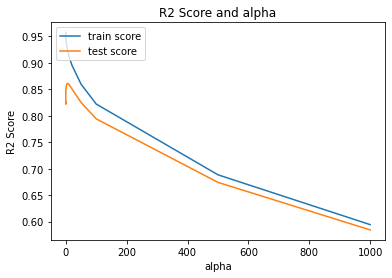

In [61]:
# plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [62]:
#Finding optimal value of alpha
ridge_model_cv.best_params_

{'alpha': 6.0}

In [63]:
ridge_model_cv.best_score_

0.8612192469861721

In [64]:
#Apply optimal value of alpha to fit the model
alpha=6.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge(alpha=6.0)

In [65]:
#printing coefficient values of features in ridge model
ridge.coef_

array([-2.23069508e-02,  2.72775836e-02,  9.17362157e-02,  6.27640241e-02,
        1.49678744e-02,  2.43819521e-02,  8.84927919e-03,  2.09955362e-02,
        1.39041205e-02,  2.38933865e-02,  3.18835403e-02,  6.13470664e-02,
        5.20928130e-02,  1.95564424e-03,  7.17905731e-02,  3.80239569e-02,
       -6.98410539e-04,  4.74565782e-02,  2.01153433e-02,  2.72351489e-02,
       -1.13691535e-02,  5.85682777e-02,  1.38159736e-02,  4.55495074e-02,
        3.66764750e-02,  2.82117627e-02,  5.96828513e-03,  1.11799417e-02,
        1.41692832e-02,  1.93062943e-02, -9.96950863e-03,  2.39970800e-03,
       -1.94793754e-04, -5.93987291e-03,  2.60430425e-02,  2.74520122e-02,
        2.99924109e-02,  2.01457355e-02,  1.18113065e-02, -9.92121391e-04,
        1.48652432e-02,  6.38998680e-03, -1.64113646e-02, -1.44815415e-04,
        1.75378278e-02,  1.59510215e-02,  1.25422531e-02, -7.09568477e-03,
        1.12543424e-02, -1.32243528e-02, -8.22617533e-03, -5.35261467e-03,
        4.22894520e-03,  

**Observation**
- The optimal values of lambda with Ridge regression is 6.0

## Step 6: Model Evaluation

### Check Lasso Model Evaluation

#### Model evaluation on training data

In [66]:
y_train_pred = lasso.predict(X_train)
metrics.r2_score(y_train, y_train_pred)

0.9193361897608738

#### Model evaluation on test data

In [67]:
y_test_pred = lasso.predict(X_test)
metrics.r2_score(y_test, y_test_pred)

0.8564554042776242

**Observation**

- R2 score on training set is 91.9% and R2 score on testing set is 85.6% which is good.

### Check Ridge Model Evaluation

#### Model evaluation on training data

In [68]:
y_train_pred = ridge.predict(X_train)

In [69]:
metrics.r2_score(y_train, y_train_pred)

0.9208727704105812

#### Model evaluation on test data

In [70]:
y_test_pred = ridge.predict(X_test)

In [71]:
metrics.r2_score(y_test, y_test_pred)

0.8781901583540531

**Observation**
- R2 score on training set is 92.0% and R2 score on testing set is 87.8% which is good.

## Choosing the best model

In [72]:
coef_df = pd.DataFrame(index=X_train.columns)
coef_df.rows = X_train.columns
coef_df['Ridge'] = ridge.coef_
coef_df['Lasso'] = lasso.coef_
coef_df['abs_value_coeff']= abs (coef_df['Lasso'])
sorted_coef_df = coef_df.sort_values('abs_value_coeff', ascending=False)
print(sorted_coef_df)

                        Ridge     Lasso  abs_value_coeff
GrLivArea            0.071791  0.334406         0.334406
PoolQC_Gd           -0.051625 -0.270314         0.270314
OverallQual          0.091736  0.162771         0.162771
OverallCond          0.062764  0.088835         0.088835
Condition2_PosN     -0.034625 -0.062765         0.062765
...                       ...       ...              ...
Exterior1st_Stucco  -0.003343 -0.000000         0.000000
Exterior1st_VinylSd -0.000818  0.000000         0.000000
LotArea              0.027278  0.000000         0.000000
Exterior1st_WdShing  0.005988  0.000000         0.000000
MSZoning_RM          0.020146 -0.000000         0.000000

[257 rows x 3 columns]


### Check features eliminated by Lasso

In [73]:
FeaturesEliminated = coef_df[coef_df['abs_value_coeff'] == 0].index.tolist()

In [74]:
FeaturesEliminated

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'MSZoning_RH',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_None',
 'Alley_Pave',
 'LotShape_IR3',
 'LandContour_HLS',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_CollgCr',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_RRAe',
 'Condition2_RRAn',
 

**Observation**
- With Lasso model, R2 score on training set is 91.9% and R2 score on testing set is 85.6% which is good. Model has performed well on train and test data.
- With Ridge model, R2 score on training set is 92.0% and R2 score on testing set is 87.8% which is good. Model has performed well on train and test data.
-  Model evaluation results for both lasso and ridge model on train data as well as test data are at par. Ridge model is performing slightly better.
- We have evaluated models based on 257 features. Since most of the features are eliminated by Lasso hence we will select Lasso as the best model.

### <span style = "color:green"> Final model slected is Lasso Regression with alpha 0.00025 </span>

### <span style="color:green"> Top 10 significant features in predicting the price of a house</span>

In [75]:
sorted_coef_df.head(10)

,Ridge,Lasso,abs_value_coeff
GrLivArea,0.071791,0.334406,0.334406
PoolQC_Gd,-0.051625,-0.270314,0.270314
OverallQual,0.091736,0.162771,0.162771
OverallCond,0.062764,0.088835,0.088835
Condition2_PosN,-0.034625,-0.062765,0.062765
GarageCars,0.045550,0.054730,0.054730
BsmtFullBath,0.038024,0.047409,0.047409
TotRmsAbvGrd,0.058568,0.040855,0.040855
Neighborhood_Crawfor,0.043052,0.040501,0.040501
YearBuilt,0.014968,0.035213,0.035213


### <span style="color:green"> How well those variables describe the price of a house.</span>

##### All non-zero features selected by Lasso are able to explain 89.6% of the variability in the observed data in the target variable. This is as seen during model evaluation based on R2 score.

In [76]:
sorted_coef_df

,Ridge,Lasso,abs_value_coeff
GrLivArea,0.071791,0.334406,0.334406
PoolQC_Gd,-0.051625,-0.270314,0.270314
OverallQual,0.091736,0.162771,0.162771
OverallCond,0.062764,0.088835,0.088835
Condition2_PosN,-0.034625,-0.062765,0.062765
...,...,...,...
Exterior1st_Stucco,-0.003343,-0.000000,0.000000
Exterior1st_VinylSd,-0.000818,0.000000,0.000000
LotArea,0.027278,0.000000,0.000000
Exterior1st_WdShing,0.005988,0.000000,0.000000


## Supportings for Problem Statement -Part II

### Double the value of alpha 0.00025 for Lasso Regression

In [80]:
alpha=0.0005
lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train) 


Lasso(alpha=0.0005)

### Lasso model evaluation on train data

In [81]:
y_train_pred2 = lasso2.predict(X_train)
metrics.r2_score(y_train, y_train_pred2)

0.8925378178261526

In [82]:
lasso2.coef_

array([-0.02867871,  0.        ,  0.19016333,  0.06317521,  0.00854389,
        0.02316804,  0.        ,  0.        ,  0.        ,  0.0004713 ,
        0.        ,  0.        ,  0.        , -0.        ,  0.25091395,
        0.04067015,  0.        ,  0.03446125,  0.01125084,  0.        ,
       -0.        ,  0.05220337,  0.        ,  0.08180727,  0.00221352,
        0.01676572,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.00211906,  0.00455248,
        0.        ,  0.02110794, -0.00281491,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.00260328,  0.        ,
        0.        ,  0.        , -0.        ,  0.00928956, -0.        ,
       -0.        , -0.00133121,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.01384251,  0.        ,  0.03061549,
       -0.01787145, -0.00329878, -0.01337949, -0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.01976041,  0.03

###### Double the value of alpha 6.0 for Ridge Regression

In [84]:
alpha=12.0
ridge2 = Ridge(alpha=alpha)
        
ridge2.fit(X_train, y_train) 

Ridge(alpha=12.0)

### Ridge model evaluation on train data

In [85]:
y_train_pred3 = ridge2.predict(X_train)
metrics.r2_score(y_train, y_train_pred3)

0.9092405007768518

In [86]:
ridge2.coef_

array([-2.09256479e-02,  1.80203434e-02,  7.50041161e-02,  4.89607313e-02,
        1.05541268e-02,  2.66524506e-02,  1.12308510e-02,  1.67090189e-02,
        1.03936506e-02,  2.36161112e-02,  2.69710604e-02,  4.70543478e-02,
        4.33443916e-02,  1.57839420e-03,  5.64169532e-02,  3.12573321e-02,
       -1.09726437e-03,  4.47246872e-02,  1.95207702e-02,  2.59027485e-02,
       -4.88315213e-03,  5.41614557e-02,  1.62379338e-02,  4.15703534e-02,
        3.44678533e-02,  2.53042964e-02,  8.50786053e-03,  7.55937937e-03,
        8.52435789e-03,  1.53605835e-02, -5.91910677e-03,  1.01233338e-03,
        5.56031895e-04, -5.76195468e-03,  1.66672893e-02,  1.64988785e-02,
        2.23661720e-02,  6.21688206e-03,  9.13336458e-03, -2.26625055e-03,
        1.23951903e-02,  5.47966195e-03, -1.20448962e-02, -1.48438187e-03,
        1.34945850e-02,  1.09100909e-02,  8.54602480e-03, -3.82202927e-03,
        1.06407357e-02, -1.14035910e-02, -3.84469346e-03, -5.25647356e-03,
        4.92442562e-03,  

In [87]:
coef_df = pd.DataFrame(index=X_train.columns)
coef_df.rows = X_train.columns
coef_df['Ridge'] = ridge2.coef_
coef_df['Lasso'] = lasso2.coef_
coef_df['abs_value_coeff']= abs (coef_df['Lasso'])
sorted_coef_df = coef_df.sort_values('abs_value_coeff', ascending=False)
print(sorted_coef_df)

                        Ridge     Lasso  abs_value_coeff
GrLivArea            0.056417  0.250914         0.250914
OverallQual          0.075004  0.190163         0.190163
GarageCars           0.041570  0.081807         0.081807
OverallCond          0.048961  0.063175         0.063175
TotRmsAbvGrd         0.054161  0.052203         0.052203
...                       ...       ...              ...
Exterior1st_BrkComm -0.007743 -0.000000         0.000000
Exterior1st_CBlock  -0.003613 -0.000000         0.000000
Exterior1st_CemntBd  0.001507 -0.000000         0.000000
Exterior1st_HdBoard -0.003851 -0.000000         0.000000
MasVnrType_Stone     0.007277  0.000000         0.000000

[257 rows x 3 columns]


In [88]:
sorted_coef_df.head(10)

,Ridge,Lasso,abs_value_coeff
GrLivArea,0.056417,0.250914,0.250914
OverallQual,0.075004,0.190163,0.190163
GarageCars,0.041570,0.081807,0.081807
OverallCond,0.048961,0.063175,0.063175
TotRmsAbvGrd,0.054161,0.052203,0.052203
BsmtFullBath,0.031257,0.040670,0.040670
Neighborhood_NridgHt,0.030700,0.034664,0.034664
FullBath,0.044725,0.034461,0.034461
Neighborhood_Crawfor,0.037078,0.030615,0.030615
MSSubClass,-0.020926,-0.028679,0.028679


### Excluding the five most important predictor variables and rebuilding the model

#### Top 5 predictor variable as seen before are
#### GrLivArea, PoolQC_Gd, OverallQual, OverallCond, Condition2_PosN

In [89]:
#Excluding 5 most imp predictor variables
X_train1 =  X_train.drop(["GrLivArea", "PoolQC_Gd", "OverallQual", "OverallCond", "Condition2_PosN"], axis=1)
X_train1.head()

,MSSubClass,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
984,0.411765,0.040455,0.760870,0.450000,0.000,0.000000,0.000000,0.000000,0.000000,0.215278,...,0,0,0,0,0,0,0,0,1,0
1416,1.000000,0.046139,0.094203,0.000000,0.000,0.000000,0.000000,0.332620,0.127169,0.202315,...,0,0,0,0,1,0,0,0,1,0
390,0.176471,0.032409,0.202899,0.000000,0.000,0.042700,0.265265,0.098031,0.140917,0.136343,...,0,0,0,0,1,0,0,0,1,0
877,0.235294,0.034416,0.956522,0.916667,0.135,0.207300,0.000000,0.125000,0.239280,0.252315,...,0,0,0,0,1,0,0,0,1,0
567,0.000000,0.040670,0.956522,0.900000,0.105,0.000354,0.000000,0.648545,0.248282,0.269213,...,0,0,0,0,1,0,0,0,1,0


In [90]:
### Rebuild Lasso Regression Model using final model and optimal alpha value
alpha=0.00025
lasso3 = Lasso(alpha=alpha)
        
lasso3.fit(X_train1, y_train) 

Lasso(alpha=0.00025)

In [91]:
### Choosing five most important predictor variables  
coef_df = pd.DataFrame(index=X_train1.columns)
coef_df.rows = X_train1.columns
coef_df['Lasso'] = lasso3.coef_
coef_df['abs_value_coeff']= abs (coef_df['Lasso'])
sorted_coef_df = coef_df.sort_values('abs_value_coeff', ascending=False)
print(sorted_coef_df.head(5))

                         Lasso  abs_value_coeff
1stFlrSF              0.260714         0.260714
2ndFlrSF              0.127221         0.127221
GarageCars            0.068352         0.068352
TotRmsAbvGrd          0.062453         0.062453
Neighborhood_NridgHt  0.049279         0.049279
